# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito de este proyecto es determinar qué plan prepago genera más ingresos en función del comportamiento de sus respectivos clientes.

## Inicializacion

In [332]:
# Cargar librerias
from scipy import stats as st
from matplotlib import pyplot as plt
import math as mt
import pandas as pd
import numpy as np
import seaborn as sns
import math
# Configuracion para el tamaño de los graficos
sns.set(rc={"figure.figsize":(15, 10)})


## Carga de datos

In [335]:
# Carga los archivos de datos en diferentes DataFrames

import pandas as pd

# Define la ruta base
ruta_base = r'C:\Users\cesar\OneDrive\Escritorio\Portafolio Github\Sprint 3'

# Carga los archivos CSV
calls = pd.read_csv(rf'{ruta_base}\megaline_calls.csv')
internet = pd.read_csv(rf'{ruta_base}\megaline_internet.csv')
messages = pd.read_csv(rf'{ruta_base}\megaline_messages.csv')
plans = pd.read_csv(rf'{ruta_base}\megaline_plans.csv')
users = pd.read_csv(rf'{ruta_base}\megaline_users.csv')

# Muestra un resumen de uno de los DataFrames para verificar que se cargó correctamente
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


## Preparar los datos

## Tarifas

In [339]:
# Informacion general sobre el DataFrane de planes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [341]:
# Muestra de datos de planes
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There are only two rows of of data in this DataFrame, plans. The first row contains information on the Surf plan, and the second row contains information on the Ultimate plan. The data types appear to be correct. No further actions are required to correct the data types.

## Corregir datos

No requiere correcciones

## Enriquecer datos

Se añade una columna para convertir megabytes incluidos en gigabytes.

In [348]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [351]:
# Información general sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [353]:
# Muestra de datos de usuario
display(users.sample(n = 5, replace = True))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
315,1315,Mora,Schroeder,45,"Raleigh-Cary, NC MSA",2018-04-26,surf,2018-10-03
296,1296,Weston,Conley,36,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-10-20,ultimate,2018-12-18
227,1227,Vanesa,Willis,29,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-17,surf,NaN
317,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,NaN
233,1233,Janee,Perkins,33,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-11,surf,NaN


Los tipos de datos de las columnas reg_date y churn_date pueden modificarse a tipo datetime. Hay valores faltantes en churn_date que indican que los planes aún están en uso.

### Corregir datos

In [357]:
# Convertir reg_date y churn_date a formato datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### Enriquecer datos

No requiere modificaciones

## Llamadas

In [362]:
# Información general sobre el DataFrame de llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [364]:
# Muestra de datos de llamadas
display(calls.sample(n = 5, replace = True))

,id,user_id,call_date,duration
77586,1277_662,1277,2018-10-03,2.38
50261,1181_616,1181,2018-11-16,6.85
101968,1362_728,1362,2018-05-30,16.71
77216,1277_292,1277,2018-10-08,5.43
117790,1412_74,1412,2018-12-28,0.00


### Corregir datos

 El tipo de dato de la columna call_date debe cambiarse a datetime.

In [368]:
# Convierte call_date a formato datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

Añadir columna de mes y redondear duración de llamadas

In [372]:
# Extraer mes de la fecha de llamada a una nueva columna
calls['month'] = calls['call_date'].dt.month_name()

In [374]:
# Redondear duración de llamadas al siguiente número entero
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
display(calls.head(10))

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December
5,1000_388,1000,2018-12-31,3,December
6,1000_510,1000,2018-12-27,6,December
7,1000_521,1000,2018-12-28,15,December
8,1000_530,1000,2018-12-28,6,December
9,1000_544,1000,2018-12-26,5,December


In [376]:
calls['duration'] = calls['duration'].astype('int')
calls.head(20)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December
5,1000_388,1000,2018-12-31,3,December
6,1000_510,1000,2018-12-27,6,December
7,1000_521,1000,2018-12-28,15,December
8,1000_530,1000,2018-12-28,6,December
9,1000_544,1000,2018-12-26,5,December


## Mensajes

In [379]:
# Información general sobre el DataFrame de mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [381]:
# Muestra de datos de mensajes
display(messages.sample(n = 5))

,id,user_id,message_date
39955,1258_481,1258,2018-11-01
8728,1064_132,1064,2018-07-11
44619,1298_75,1298,2018-12-18
36586,1244_18,1244,2018-11-16
58937,1374_111,1374,2018-06-14


### Corregir datos

Cambiar el tipo de dato de message_date a datetime.

In [386]:
# Cambiar message_date a formato datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

Añadir columna de mes.

In [390]:
# Añadir columna de mes para message_date
messages['month'] = messages['message_date'].dt.month_name()

## Internet

In [393]:
# Información general sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [395]:
#  Muestra de datos de tráfico de internet

internet.sample(n = 10)

,id,user_id,session_date,mb_used
79564,1371_191,1371,2018-11-02,79.94
78538,1366_227,1366,2018-09-05,226.62
40624,1182_335,1182,2018-07-17,918.15
91581,1423_96,1423,2018-10-31,0.00
35952,1162_71,1162,2018-12-05,0.00
59245,1267_47,1267,2018-12-14,310.52
5801,1031_485,1031,2018-07-30,467.69
65739,1304_139,1304,2018-12-31,528.11
50722,1226_203,1226,2018-10-06,580.10
93041,1434_278,1434,2018-09-02,448.87


Much like with the other DataFrame, the data type for the 'session_date' column needs to be changed to a datetime data type. No other issues are present.



### Corregir los datos

Cambiar el tipo de dato de session_date a datetime.

In [401]:
# Cambiar session_date a formato datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

Añadir columna de mes.

In [405]:
# Añadir columna de mes para session_date
internet['month'] = internet['session_date'].dt.month_name()


## Esudiar las condiciones de las tarifas

In [408]:
# Revisar las condiciones de los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario
Vamos a calcular el número de llamadas realizadas, minutos utilizados, mensajes enviados y megabytes de internet usados por cada usuario cada mes..

In [411]:
# Calcular el número de llamadas realizadas por cada usuario por mes
calls_per_month = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
display(calls_per_month.head())


,user_id,month,duration
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65


In [413]:
# Calcular el total de minutos utilizados por cada usuario por mes
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(minutes_per_month.head())


,user_id,month,duration
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393


In [415]:
# Calcular el número de mensajes enviados por cada usuario por mes
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
display(messages_per_month.head())



,user_id,month,id
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


In [417]:
# Calcular el volumen de tráfico de internet utilizado por cada usuario por mes
internet_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
display(internet_per_month.head(10))



,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
5,1001,September,13314.82
6,1002,December,14396.24
7,1002,November,19345.08
8,1002,October,6552.01
9,1003,December,27044.14


Combinar los resultados agregados en un solo DataFrame para calcular los ingresos mensuales por usuario.



In [420]:
# Combinar los datos de llamadas, minutos, mensajes e internet basado en user_id y mes
merged_data = calls_per_month.merge(right=minutes_per_month, on = ['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(right=messages_per_month, on = ['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(right=internet_per_month, on = ['user_id', 'month'], how = 'outer')

# Renombrar las columnas
merged_data.columns = ['user_id', 'month', 'calls', 'minutes', 'messages', 'mb_used']

# Reinicir indices
merged_data = merged_data.reset_index(drop = True)

# Rellenar los valores NaN con 0
merged_data = merged_data.fillna(0)


# Mostrar informacion combinada
display(merged_data.head(5))


,user_id,month,calls,minutes,messages,mb_used
0,1000,December,16.0,124.0,11.0,1901.47
1,1001,August,27.0,182.0,30.0,6919.15
2,1001,December,56.0,412.0,44.0,19369.18
3,1001,November,64.0,426.0,36.0,18504.30
4,1001,October,65.0,393.0,53.0,22330.49


Calcular los ingresos mensuales de cada cliente, considerando el uso excedente de minutos, mensajes y megabytes..

In [423]:
# Añadir infotmacion del plan
plan_info = users[['user_id', 'plan']]
plan_info.columns = ['user_id', 'plan_name']

merged_data = merged_data.merge(right=plan_info, on = 'user_id')

# fusionar los datos del plan con la informacion usada
merged_data = merged_data.merge(right=plans, on = 'plan_name')

# clasificar la informacion por usuario
merged_data = merged_data.sort_values(by='user_id').reset_index(drop = True)

# Mostrar la informacion combinada
display(merged_data.head(20))


,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15.0
2,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,15.0
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15.0
4,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15.0
5,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15.0
6,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,15.0
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,15.0
8,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,15.0
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,15.0


We now have a comprehensive dataframe of the necessary information to calculate the total monthly revenue for each client. To calculate the monthly revenue of each client, we'll need to determine if the clients exceeded their data usage limits or not. If they did, then the difference between their usage and their plan's limit will be calculated and multiplied by the specified rate. This will be done for the minutes, messages, and megabytes used by each client. Once the extra fees, if any, have been calculated, they will be added to the standard montly rate for each plan, giving the final monthly revenue.

All the above calculations have been programmed to be executed in the get_revenue function below. It should be noted that at this time the monthly internet usage for each client will finally be converted from megabytes to gigabytes, and rounded to the next highest whole gigabyte value.

In [426]:
# Calcular el ingreso mensual para cada usuario
def get_revenue(row):
    """Function to calculate the monthly revenue for each user"""
    # User's usage
    minutes = row['minutes']
    messages = row['messages']
    # Convertir uso de internet de megabytes a gigabytes y redondear al siguiente gigabyte entero
    internet = math.ceil(row['mb_used'] * (2**(-10)))
    
    # limites de plan
    minutes_limit = row['minutes_included']
    messages_limit = row['messages_included']
    # for internet usage, change from megabytes to gigabytes
    internet_limit = row['mb_per_month_included'] * (2**(-10))
    
    # tarifas
    monthly_rate = row['usd_monthly_pay']
    minute_rate = row['usd_per_minute']
    message_rate = row['usd_per_message']
    internet_rate = row['usd_per_gb']
    
    # Inicializar los valores de ingresos y asignarlos a 0
    minutes_revenue = 0
    messages_revenue = 0
    internet_revenue = 0
    
    # Calcular exceso y total de ingresos
    if minutes > minutes_limit:
        minutes_revenue = (minutes - minutes_limit) * minute_rate
    if messages > messages_limit:
        messages_revenue = (messages - messages_limit) * message_rate
    if internet > internet_limit:
        internet_revenue = (internet - internet_limit) * internet_rate
        
    revenue = monthly_rate + minutes_revenue + messages_revenue + internet_revenue
    
    return revenue


In [428]:
# Aplicar la funcion DataFrame combinada
test_rows = merged_data.loc[:10]
display(test_rows.apply(get_revenue, axis = 1))



0      70.00
1      20.00
2      60.00
3      60.00
4      90.09
5      20.00
6      20.00
7      60.00
8      20.00
9     158.12
10     60.00
dtype: float64

In [430]:
# Aplicar la funcion de datos combinada
merged_data['revenue'] = merged_data.apply(get_revenue, axis = 1)
display(merged_data.head(10))

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,revenue
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


## Estudiar comportamiento por usuario

### Llamadas

Comenzamos analizando los minutos de llamadas mensuales por cliente de cada plan.

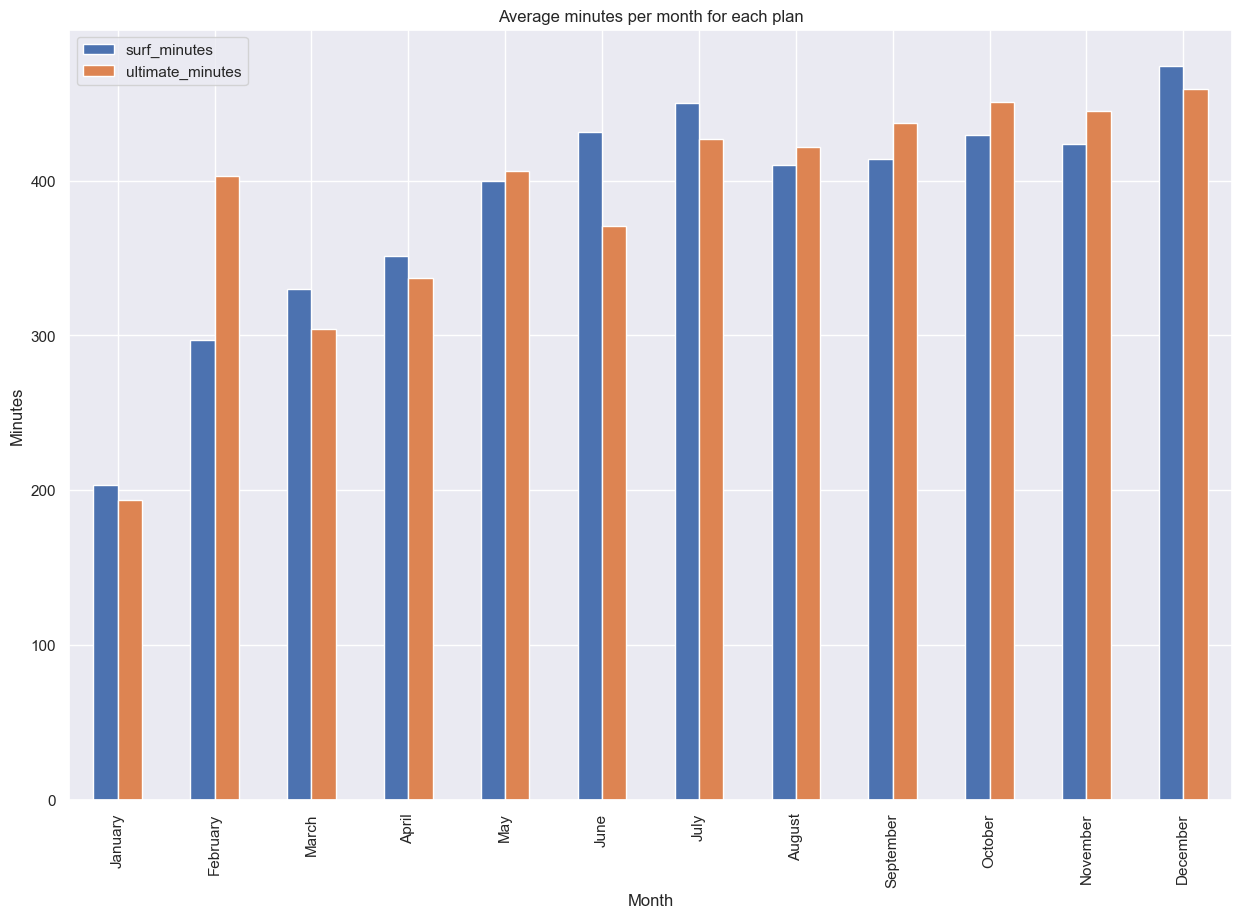

In [442]:
# Comparar la duración promedio de llamadas por mes para cada plan y visualizarlo con un gráfico de barras

# Datos del plan Surf
surf_data = merged_data[merged_data['plan_name'] == 'surf']
surf_data = surf_data.groupby('month')['minutes'].mean().reset_index()
surf_data.columns = ['month', 'surf_minutes']

# Datos del plan Ultimate
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']
ultimate_data = ultimate_data.groupby('month')['minutes'].mean().reset_index()
ultimate_data.columns = ['month', 'ultimate_minutes']

# Combinar los datos
merged_calls = surf_data.merge(right=ultimate_data, on = 'month', how = 'outer')

# Ordenar los meses cronológicamente
merged_calls.index = pd.CategoricalIndex(merged_calls['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_calls = merged_calls.sort_index()



# Graficar
merged_calls.plot(x = 'month', y = ['surf_minutes', 'ultimate_minutes'], kind = 'bar', figsize = (15, 10))
plt.title('Average minutes per month for each plan')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.show()


Los clientes del plan Surf tienden a usar menos minutos en los primeros meses del año. Los clientes del plan Ultimate muestran un aumento en el uso de minutos en febrero.

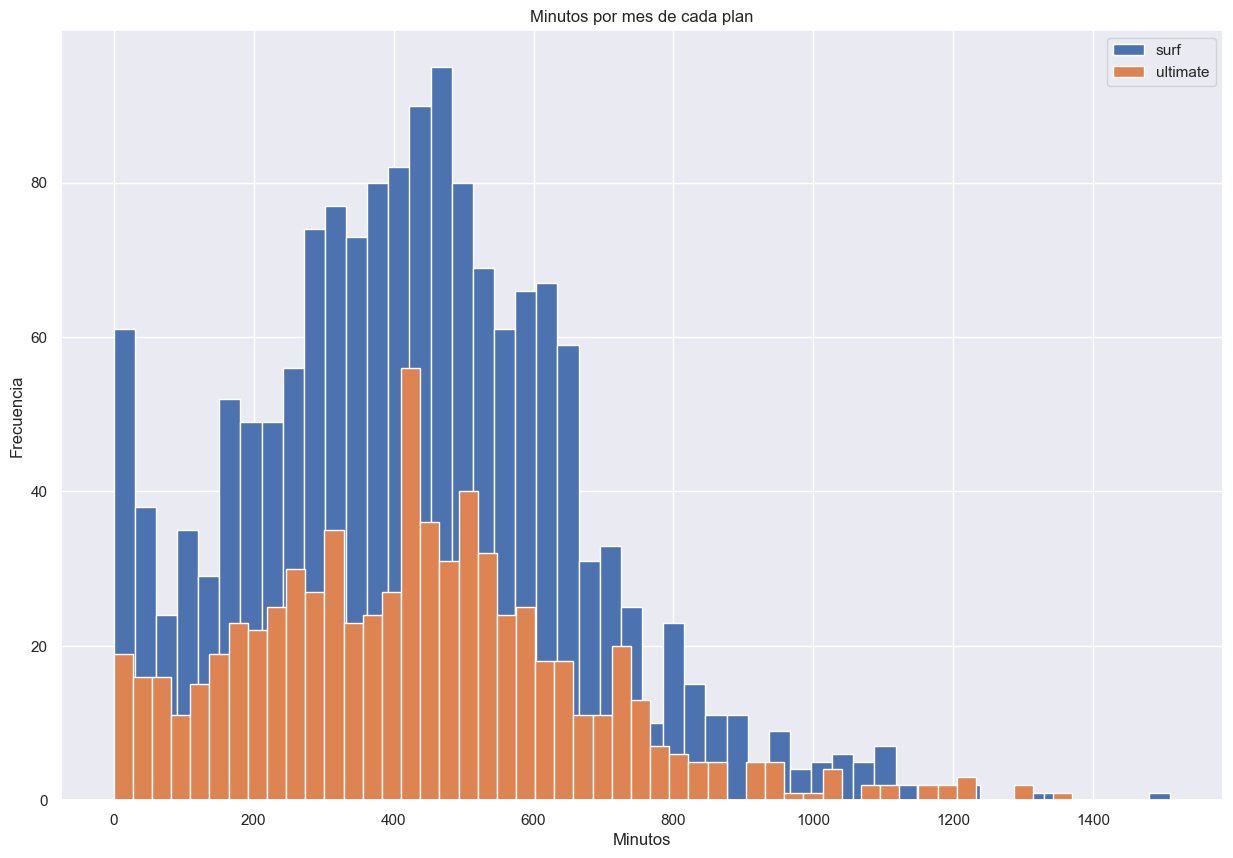

In [451]:
# Comparar el número promedio de mensajes enviados por mes para cada plan y visualizarlo con un gráfico de barras

# Datos del plan Surf
surf_data = merged_data[merged_data['plan_name'] == 'surf']['minutes'].hist(bins=50, figsize = (15, 10), label = 'surf')

# Datos del plan Ultimate
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['minutes'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

plt.title('Minutos por mes de cada plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Los clientes del plan Ultimate utilizan más datos en promedio cada mes en comparación con el plan Surf.

In [494]:
# Calcular el promedio y la varianza de la duracion de llamadas cada mes
# Comencemos por el plan Surf
surf_data_calls = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['minutes'].mean()

# Vamos por el plan Ultimate
ultimate_data_calls = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['minutes'].mean()

# Calcula el promedio, la varianza y la desviacion estandard del plan Surf
surf_mean_calls = surf_data_calls.mean()
surf_var_calls = surf_data_calls.var()
surf_std_calls = np.std(surf_data_calls)

# Calcula el promedio, la varianza y la desviacion estandard del plan Ultimate
ultimate_mean_calls = ultimate_data_calls.mean()
ultimate_var_calls = ultimate_data_calls.var()
ultimate_std_calls = np.std(ultimate_data_calls)

# Muestra los resultados
print(f'Promedio para el plan Surf: {round(surf_mean_calls,2)}')
print(f'Varianza para el plan Surf: {round(surf_var_calls,2)}')
print(f'Desviacion standar para el plan Surf: {round(surf_std_calls,2)}')
print(f'Promedio para el plan Ultimate: {round(ultimate_mean_calls,2)}')
print(f'Varianza para el plan Ultimate: {round(ultimate_var_calls,2)}')
print(f'Desviacion standar para el plan Ultimate: {round(ultimate_std_calls,2)}')

Promedio para el plan Surf: 408.74
Varianza para el plan Surf: 39748.06
Desviacion standar para el plan Surf: 199.07
Promedio para el plan Ultimate: 407.96
Varianza para el plan Ultimate: 40142.98
Desviacion standar para el plan Ultimate: 199.72


Como se indicó anteriormente al observar el histograma, el promedio mensual de minutos de llamada utilizados es prácticamente el mismo para los clientes de ambos planes. Ambos valores promedio rondan los 408 minutos de llamada. La dispersión, o desviación estándar, para ambos conjuntos de datos también es prácticamente la misma.

C:\Users\cesar\AppData\Local\Temp\ipykernel_9584\944316318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'plan_name', y = 'minutes', data = merged_data, palette = 'rocket')


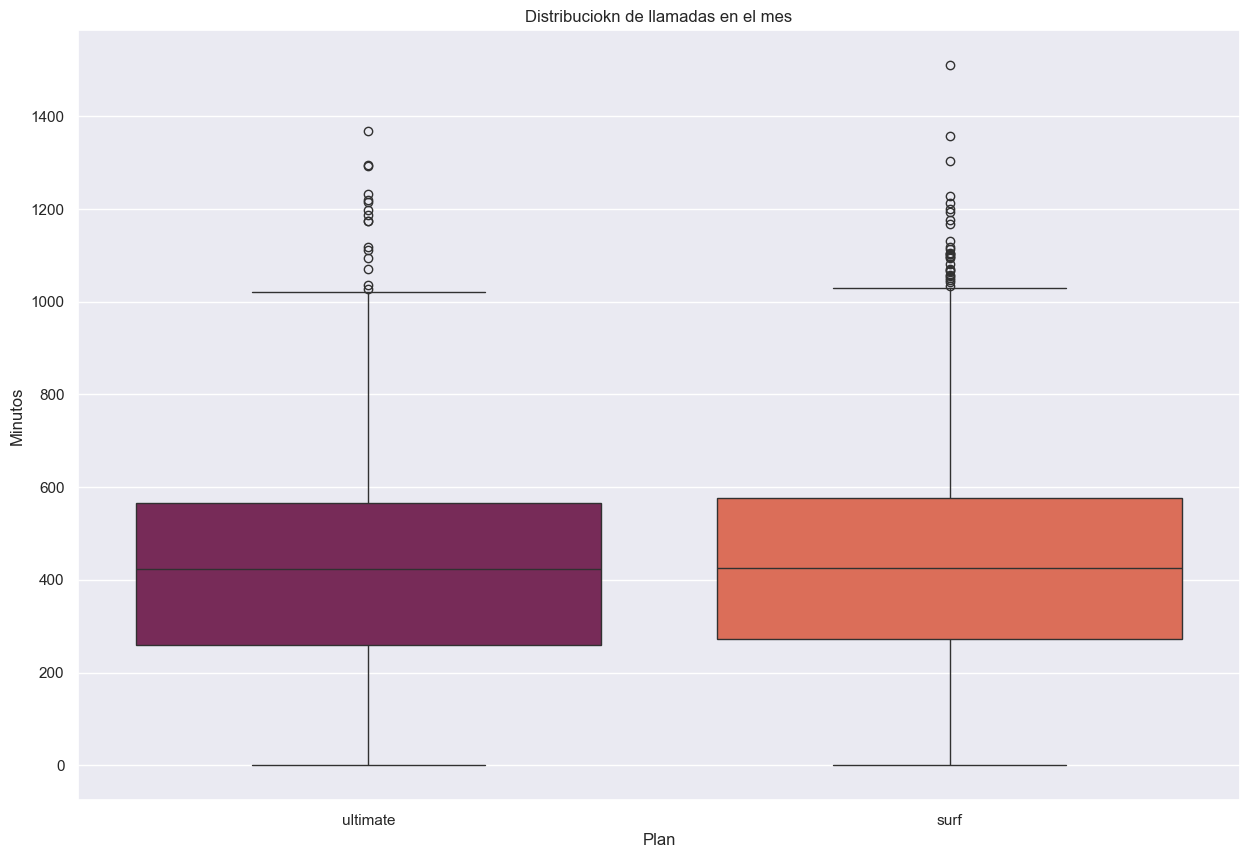

In [497]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x = 'plan_name', y = 'minutes', data = merged_data, palette = 'rocket')
plt.title('Distribuciokn de llamadas en el mes')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.show()


Como se indicó anteriormente al observar el histograma, el promedio mensual de minutos de llamada utilizado es prácticamente el mismo para los clientes de ambos aviones. Ambos valores promedio rondan los 408 minutos de llamada. La dispersión, o desviación estándar, para ambos conjuntos de datos también es prácticamente la misma

### Mensajes

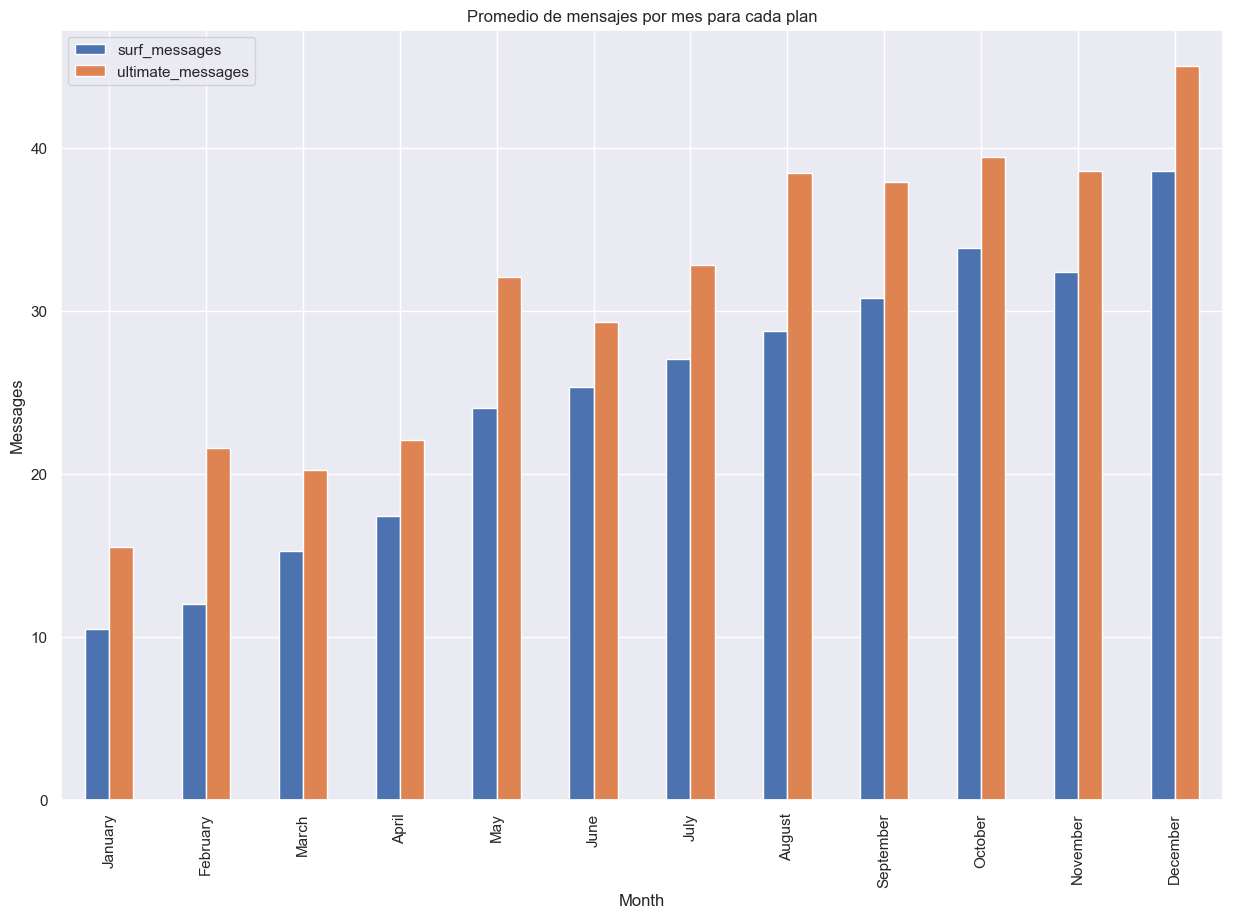

In [513]:
# Comparacion de la cantidad de mensajes que los usuarios de cada plan suelen enviar cada mes
# Informacion del plan Surf 
surf_messages = round(merged_data[merged_data['plan_name'] == 'surf'].groupby('month')['messages'].mean(), 2)

# Informacion del plan Ultimate
ultimate_messages = round(merged_data[merged_data['plan_name'] == 'ultimate'].groupby('month')['messages'].mean(), 2)

# Cominacion de datos 
merged_messages = surf_messages.to_frame().merge(right=ultimate_messages.to_frame(), on = 'month', how = 'outer')

merged_messages.columns = ['surf_messages', 'ultimate_messages']

# clasificacamos el indice de manera cronologica
merged_messages.index = pd.CategoricalIndex(merged_messages.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_messages.sort_index(inplace=True)



# ajustes del grafico
merged_messages.plot(kind = 'bar', figsize = (15, 10))
plt.title('Promedio de mensajes por mes para cada plan')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.show()

Como se muestra arriba, el promedio mensual de mensajes enviados por los clientes del plan Surf comienza en enero, con su nivel más bajo, y aumenta gradualmente a lo largo del año. El mayor número de mensajes enviados por los clientes del plan Surf se registró en diciembre, con un promedio de aproximadamente 37 mensajes. Este patrón de aumento gradual en los valores podría deberse a la misma razón por la que los minutos de llamada utilizados aumentaron gradualmente a lo largo del año.

Al igual que con los minutos de llamada, el plan Surf solo ofrece 50 mensajes prepago al mes, y el promedio mensual de los clientes se acerca bastante a ese límite de 50.

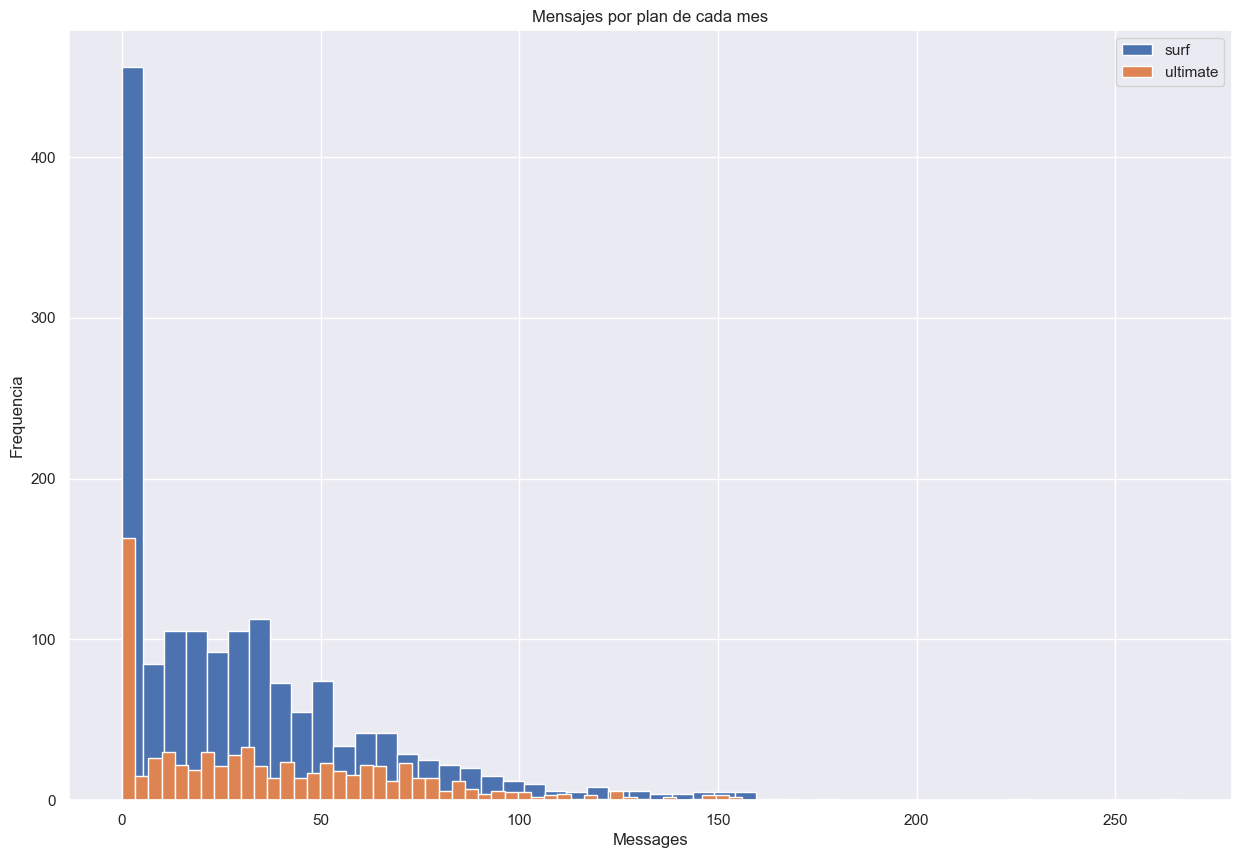

In [523]:
# Comparar la cantidad de mensajes enviado

# Get the data for the surf plan and plot the histogram
surf_data = merged_data[merged_data['plan_name'] == 'surf']['messages'].hist(bins=50, figsize = (15, 10), label = 'surf')

# Get the data for the ultimate plan and plot the histogram

ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['messages'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

# Set the title and labels
plt.title('Mensajes por plan de cada mes')
plt.xlabel('Messages')
plt.ylabel('Frequencia')
plt.legend()
plt.show()

es importante destacar que un grupo considerable de clientes en ambos grupos tiende a superar los 50 mensajes mensuales. Esto es inesperado para los clientes del plan Surf debido al límite de mensajes del plan. Una vez que los clientes del plan Surf alcanzan los 50 mensajes enviados ese mes, cada mensaje adicional cuesta 3 centavos. Esto puede suponer rápidamente una cantidad considerable de dinero.

## Conclusion general


En general, los clientes del plan Ultimate se mantuvieron dentro de los límites de datos de sus planes. En la mayoría de los casos, solo pagaron su tarifa de servicio estándar de 70 USD para el plan Ultimate y nada más. Si bien esta tarifa de servicio estándar de 70 USD es mayor que la tarifa de servicio estándar de 20 USD para el plan Surf, se determinó que una gran mayoría de los clientes del plan Surf exceden sus límites mensuales de uso de datos y terminan pagando más dinero. Para cada tipo de uso de datos, al menos una cuarta parte de los clientes del plan Surf exceden sus límites mensuales. La observación más significativa fue que al menos la mitad de los clientes del plan Surf exceden su límite mensual de internet de 15 GB. Una cuarta parte de los clientes del plan Surf paga 40 USD adicionales por su uso de internet, ya que usan más de 18 GB. 